<a href="https://colab.research.google.com/github/mdhasanali3/loan_risk_check/blob/main/descriptive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## importing necessary liabraries


In [2]:
import os
import pandas as pd  # First, we'll import Pandas, a data processing and CSV file I/O library
import numpy as np
from datetime import datetime

from sklearn import preprocessing,metrics 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#'/content/drive/MyDrive/Brain_Station_23/RnD_Lab/
df_loan = pd.read_csv('loans50k.csv', encoding='latin-1')
df_loan.head() # Output the first five rows.

,loanID,amount,term,rate,payment,grade,employment,length,home,income,verified,status,reason,state,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,Source Verified,Charged Off,credit_card,CA,30.05,0.0,0.0,11.0,0.0,0.55,15.0,5914.67000,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,Not Verified,Fully Paid,debt_consolidation,PA,8.74,0.0,2.0,12.0,0.0,0.36,15.0,12024.75000,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,Verified,Current,debt_consolidation,CA,14.50,0.0,1.0,8.0,0.0,0.83,14.0,31668.65000,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,Source Verified,Fully Paid,debt_consolidation,CA,14.14,0.0,0.0,12.0,3.0,0.01,48.0,23827.22901,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,Source Verified,Current,debt_consolidation,NJ,5.14,0.0,0.0,8.0,0.0,0.58,22.0,9599.69000,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


# descriptive analysis
* dataset descriptive information


Insights
* total 22 floating type feature
* total 1 integer type feature
* total 9 object type feature

In [5]:
df_loan.describe()

,loanID,amount,rate,payment,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
count,50000.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49981.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49999.000000,49999.000000,49511.000000,49479.000000,4.999900e+04,4.999900e+04,49999.000000,4.999900e+04
mean,327093.454600,15145.527911,0.130407,442.737519,7.617379e+04,18.731157,0.346167,0.639553,11.849217,0.232925,0.546419,25.749595,14612.566370,1.397782e+05,3.243594e+04,4.557831,13189.526651,9154.930945,63.188468,1.718866e+05,5.088178e+04,21190.290466,4.244567e+04
std,189495.851384,8527.772776,0.044192,244.835744,6.523503e+04,8.444506,0.907636,0.938869,5.524801,0.624342,0.236451,12.097421,9386.538643,1.526384e+05,3.269753e+04,3.079680,15561.787118,14296.865563,27.205695,1.697017e+05,4.731099e+04,21250.776922,4.329564e+04
min,16.000000,1000.000000,0.050000,30.540000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000e+02,0.000000e+00,0.000000,0.000000e+00
25%,163310.250000,8500.000000,0.100000,265.840000,4.623850e+04,12.390000,0.000000,0.000000,8.000000,0.000000,0.370000,17.000000,7605.040000,3.061900e+04,1.400000e+04,2.000000,3170.000000,1235.000000,43.100000,5.000100e+04,2.211000e+04,7500.000000,1.500000e+04
50%,324662.500000,13800.000000,0.130000,385.790000,6.500000e+04,18.210000,0.000000,0.000000,11.000000,0.000000,0.550000,24.000000,12404.910000,8.107300e+04,2.400000e+04,4.000000,7356.000000,4052.000000,67.100000,1.120710e+05,3.862600e+04,14700.000000,3.200000e+04
75%,491706.250000,20000.000000,0.160000,578.680000,9.000000e+04,24.730000,0.000000,1.000000,15.000000,0.000000,0.730000,33.000000,19665.062115,2.094385e+05,4.030000e+04,6.000000,18223.500000,10868.500000,87.000000,2.498060e+05,6.390300e+04,27600.000000,5.679400e+04
max,656728.000000,35000.000000,0.290000,1407.010000,7.446395e+06,61.210000,15.000000,6.000000,76.000000,28.000000,1.670000,162.000000,58697.442090,2.552960e+06,1.060800e+06,50.000000,358652.000000,373005.000000,161.000000,2.711061e+06,1.094819e+06,560800.000000,1.027358e+06


### data quality check
#### dataset shape

#### null values

In [6]:
print("row  ",df_loan.shape[0])
print("col    ",df_loan.shape[1])
print("missing   \n",df_loan.isnull().sum())

row   50000
col     32
missing   
 loanID            0
amount            1
term              1
rate              1
payment           1
grade             1
employment     2785
length         2681
home              1
income            1
verified          1
status            1
reason            1
state             1
debtIncRat        1
delinq2yr         1
inq6mth           1
openAcc           1
pubRec            1
revolRatio       19
totalAcc          1
totalPaid         1
totalBal          1
totalRevLim       1
accOpen24         1
avgBal            1
bcOpen          489
bcRatio         521
totalLim          1
totalRevBal       1
totalBcLim        1
totalIlLim        1
dtype: int64


Insights


---


null value contain col are
* employment
* length
* revolRatio
* bcOpen
* bc Ratio


#### column list
### unique values each columns
#### total missing values





In [7]:
df_loan.nunique()

loanID         50000
amount          1254
term               2
rate              25
payment        15328
grade              7
employment     21400
length            11
home               3
income          4990
verified           3
status             7
reason            13
state             49
debtIncRat      3927
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       123
totalAcc         102
totalPaid      47665
totalBal       45093
totalRevLim     2946
accOpen24         33
avgBal         24328
bcOpen         19590
bcRatio         1114
totalLim       42726
totalRevBal    39388
totalBcLim      1877
totalIlLim     33042
dtype: int64

## dropping null records


In [8]:
grade_loan=df_loan.copy()

In [9]:
grade_loan = grade_loan.dropna() 
df_loan = df_loan.dropna() 

## deleteing some irrelevent columns


In [10]:
del_col=['state','status','verified','employment']
grade_loan=grade_loan.drop(labels= del_col,axis=1)

In [11]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  object 
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  object 
 6   length       46714 non-null  object 
 7   home         46714 non-null  object 
 8   income       46714 non-null  float64
 9   reason       46714 non-null  object 
 10  debtIncRat   46714 non-null  float64
 11  delinq2yr    46714 non-null  float64
 12  inq6mth      46714 non-null  float64
 13  openAcc      46714 non-null  float64
 14  pubRec       46714 non-null  float64
 15  revolRatio   46714 non-null  float64
 16  totalAcc     46714 non-null  float64
 17  totalPaid    46714 non-null  float64
 18  totalBal     46714 non-null  float64
 19  tota

In [12]:
grade_loan.describe()

,loanID,amount,rate,payment,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
count,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000
mean,326901.441431,15342.429464,0.130209,447.475290,7.755333e+04,18.677516,0.346705,0.641157,11.972171,0.225350,0.548448,25.847776,14810.810369,1.424781e+05,3.271266e+04,4.577621,13308.496425,9144.511153,63.353772,1.748247e+05,52023.914158,21531.246157,43545.898189
std,189922.890203,8542.639785,0.044255,245.254445,6.630007e+04,8.410715,0.907830,0.940866,5.545394,0.613409,0.235892,12.115766,9420.487502,1.537507e+05,3.217022e+04,3.081678,15535.903900,14171.693125,27.134613,1.707713e+05,47351.460193,21072.456424,43528.790210
min,16.000000,1000.000000,0.050000,30.540000,1.000000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,3.000000e+02,0.000000,0.000000,0.000000,0.000000,7.000000e+02,0.000000,0.000000,0.000000
25%,161636.250000,9000.000000,0.100000,269.520000,4.800000e+04,12.360000,0.000000,0.000000,8.000000,0.000000,0.370000,17.000000,7772.738393,3.173225e+04,1.430000e+04,2.000000,3250.000000,1243.250000,43.400000,5.152150e+04,22904.250000,7800.000000,16000.000000
50%,325205.000000,14000.000000,0.130000,391.280000,6.500000e+04,18.150000,0.000000,0.000000,11.000000,0.000000,0.550000,24.000000,12632.952945,8.426600e+04,2.430000e+04,4.000000,7536.500000,4077.000000,67.300000,1.152945e+05,39601.000000,15100.000000,33000.000000
75%,492359.000000,20000.000000,0.160000,586.745000,9.200000e+04,24.640000,0.000000,1.000000,15.000000,0.000000,0.730000,33.000000,19974.226065,2.129392e+05,4.070000e+04,6.000000,18419.750000,10915.750000,87.100000,2.536075e+05,65289.000000,28000.000000,58169.500000
max,656727.000000,35000.000000,0.290000,1407.010000,7.446395e+06,61.210000,15.000000,6.000000,76.000000,28.000000,1.670000,162.000000,58697.442090,2.552960e+06,1.013700e+06,50.000000,358652.000000,373005.000000,161.000000,2.661185e+06,928934.000000,373100.000000,689474.000000


In [13]:
print("row  ",grade_loan.shape[0])
print("col    ",grade_loan.shape[1])
print("missing   \n",grade_loan.isnull().sum())

row   46714
col     28
missing   
 loanID         0
amount         0
term           0
rate           0
payment        0
grade          0
length         0
home           0
income         0
reason         0
debtIncRat     0
delinq2yr      0
inq6mth        0
openAcc        0
pubRec         0
revolRatio     0
totalAcc       0
totalPaid      0
totalBal       0
totalRevLim    0
accOpen24      0
avgBal         0
bcOpen         0
bcRatio        0
totalLim       0
totalRevBal    0
totalBcLim     0
totalIlLim     0
dtype: int64


In [14]:
print ("\nfeatures/columns : \n" ,grade_loan.columns.tolist())
print ("\nunique values :  \n",grade_loan.nunique())
print ("\ntotal missing values :  ", grade_loan.isnull().sum().values.sum())


features/columns : 
 ['loanID', 'amount', 'term', 'rate', 'payment', 'grade', 'length', 'home', 'income', 'reason', 'debtIncRat', 'delinq2yr', 'inq6mth', 'openAcc', 'pubRec', 'revolRatio', 'totalAcc', 'totalPaid', 'totalBal', 'totalRevLim', 'accOpen24', 'avgBal', 'bcOpen', 'bcRatio', 'totalLim', 'totalRevBal', 'totalBcLim', 'totalIlLim']

unique values :  
 loanID         46714
amount          1251
term               2
rate              25
payment        14592
grade              7
length            11
home               3
income          4288
reason            13
debtIncRat      3912
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       121
totalAcc         102
totalPaid      44627
totalBal       42500
totalRevLim     2850
accOpen24         33
avgBal         23515
bcOpen         19018
bcRatio         1111
totalLim       40431
totalRevBal    37441
totalBcLim      1839
totalIlLim     31668
dtype: int64

total missing values :   0


### Data Transformation
> Grade - Borrower's grade given basing on his/her past history - encoded to numerical values.

> home_ownership - this is feature in the dataset which had to be encoded to numerical values.

> Emp_Length - this feature was not formatted properly. It has some values which was in the format like "10+years","5years"...etc. we changed them to numerical values in the below cell.

In [15]:
#Data encoding
grade_loan['term'] = grade_loan['term'].map({' 36 months':1,' 60 months':2})
grade_loan['reason'] = grade_loan['reason'].map({"house":5, "home_improvement":4, "credit_card":4, "small_business":3, "debt_consolidation":3, "car":2, "vacation":2, "medical":2, "moving":1, "major_purchase":1, "renewable_energy":1, "wedding":1, "other":1})
grade_loan['grade'] = grade_loan['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
grade_loan["home"] = grade_loan["home"].map({"MORTGAGE":3.0,"RENT":2.0,"OWN":1.0})
grade_loan["length"] = grade_loan["length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
grade_loan["length"] = grade_loan["length"].apply(lambda x:int(x))

print("Current shape of dataset :",grade_loan.shape)
grade_loan.head()

Current shape of dataset : (46714, 28)


,loanID,amount,term,rate,payment,grade,length,home,income,reason,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,1,0.14,272.07,5,3,2.0,49966.0,4,30.05,0.0,0.0,11.0,0.0,0.55,15.0,5914.67000,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,1,0.10,354.89,6,10,3.0,50000.0,3,8.74,0.0,2.0,12.0,0.0,0.36,15.0,12024.75000,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,1,0.15,1220.33,4,10,2.0,360000.0,3,14.50,0.0,1.0,8.0,0.0,0.83,14.0,31668.65000,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,2,0.12,447.83,5,2,3.0,60000.0,3,14.14,0.0,0.0,12.0,3.0,0.01,48.0,23827.22901,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,2,0.12,266.88,6,10,3.0,64000.0,3,5.14,0.0,0.0,8.0,0.0,0.58,22.0,9599.69000,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


In [16]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  int64  
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  int64  
 6   length       46714 non-null  int64  
 7   home         46714 non-null  float64
 8   income       46714 non-null  float64
 9   reason       46714 non-null  int64  
 10  debtIncRat   46714 non-null  float64
 11  delinq2yr    46714 non-null  float64
 12  inq6mth      46714 non-null  float64
 13  openAcc      46714 non-null  float64
 14  pubRec       46714 non-null  float64
 15  revolRatio   46714 non-null  float64
 16  totalAcc     46714 non-null  float64
 17  totalPaid    46714 non-null  float64
 18  totalBal     46714 non-null  float64
 19  tota

## jointplots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


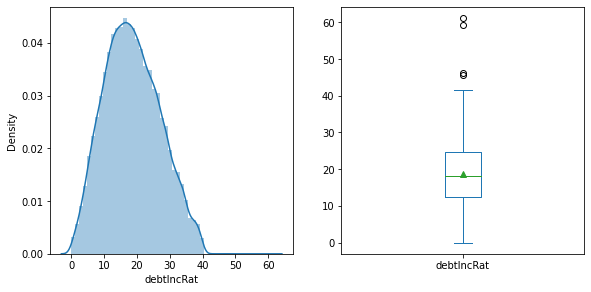

Text(0.5, 1.0, 'total credit limits  with average balance per account')

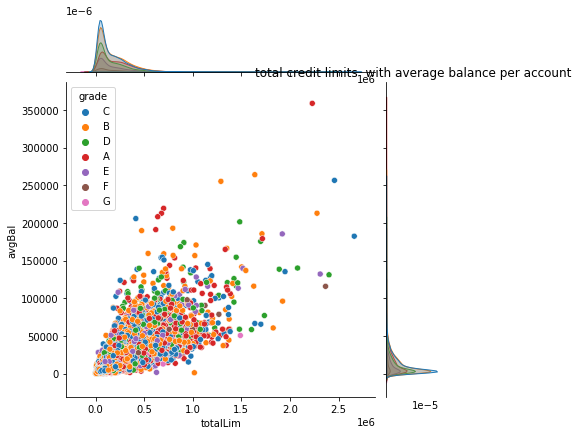

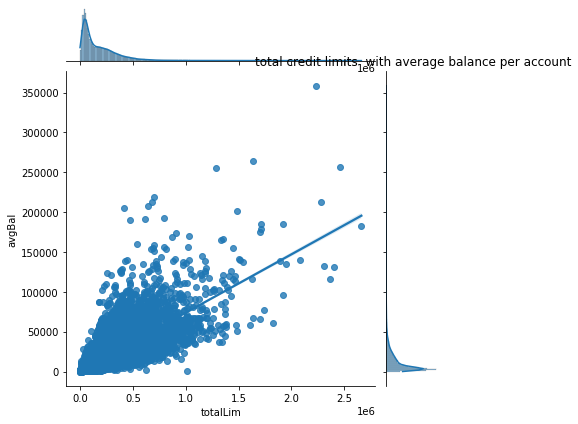

In [17]:
# The ratio monthly non-mortgage debt payment to monthly income
# is normally distributed and almost no outliers
#.residuals value is high.
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['debtIncRat'])
plt.subplot(242)
grade_loan['debtIncRat'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

# plt.figure(figsize=(10,6))
sns.jointplot(x='totalLim',y='avgBal',data=df_loan, hue="grade")
plt.title('total credit limits  with average balance per account')


sns.jointplot(x='totalLim',y='avgBal',data=df_loan, kind="reg")
plt.title('total credit limits  with average balance per account')

**Insights**

total credit limits and average balence not correlated strongly.

so we will not use these feature for model building

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


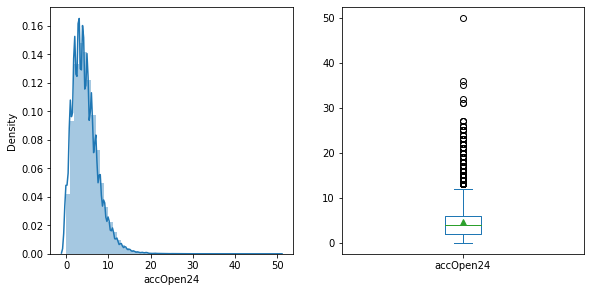

Text(0.5, 1.0, '\thow many accounts were opened in the past 24 months  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

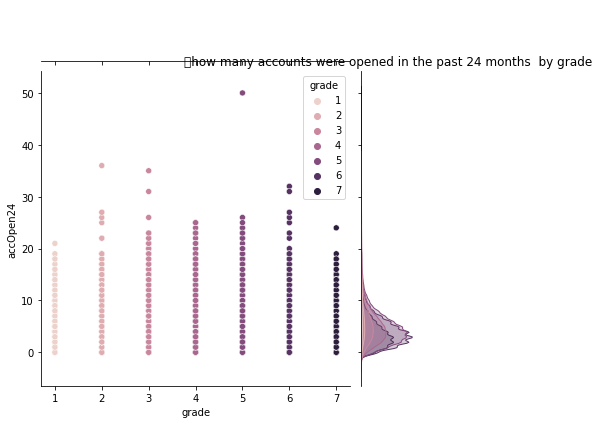

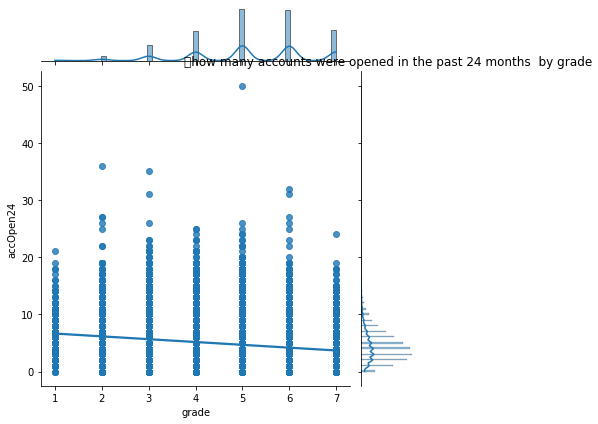

In [18]:
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['accOpen24'])
plt.subplot(242)
grade_loan['accOpen24'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='accOpen24',data=grade_loan,hue="grade")
plt.title('	how many accounts were opened in the past 24 months  by grade')
sns.jointplot(x='grade',y='accOpen24',data=grade_loan,kind="reg")
plt.title('	how many accounts were opened in the past 24 months  by grade')

Insights

From jointplot no relation between grade with account open in last 24 month. so not usefull for model building